## Pronóstico del tiempo(Forecasting weather)

### Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Cargar dataset

In [3]:
df = pd.read_csv("../0.dataset/DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


### Análisis exploratorio de los datos

In [5]:
# Obtener información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [4]:
# Obtener información estadística
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [6]:
# Observar la temperatura media a lo largo de los años
figure = px.line(df, x="date", 
                 y="meantemp", 
                 title='Mean Temperature in Delhi Over the Years')
figure.show()

In [7]:
# Observar la humedad media a lo largo de los años
figure = px.line(df, x="date", 
                 y="humidity", 
                 title='Humidity in Delhi Over the Years')
figure.show()

In [8]:
# Observar la velocidad del viento media a lo largo de los años
figure = px.line(df, x="date", 
                 y="wind_speed", 
                 title='Wind Speed in Delhi Over the Years')
figure.show()

* Se observa que hasta el año 2015 la velocidad del viento fue mayor entre los meses de agosto y septiembre.


In [13]:
# Verificando la relacion entre la temperatura y la humedad
figure = px.scatter(data_frame = df, x="humidity",
                    y="meantemp", size="meantemp", 
                    trendline="ols", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()

* Se observa una relación inversamente proporcional, donde a medida que la temperatura desciende la humedad incrementa y viceversa.

### Analizando los cambios de temperatura

In [15]:
# Extrayendo el año y el mes
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d') # tipo de dato fecha
df['year'] = df['date'].dt.year # extrayendo el año
df["month"] = df["date"].dt.month # extrayendo el mes
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


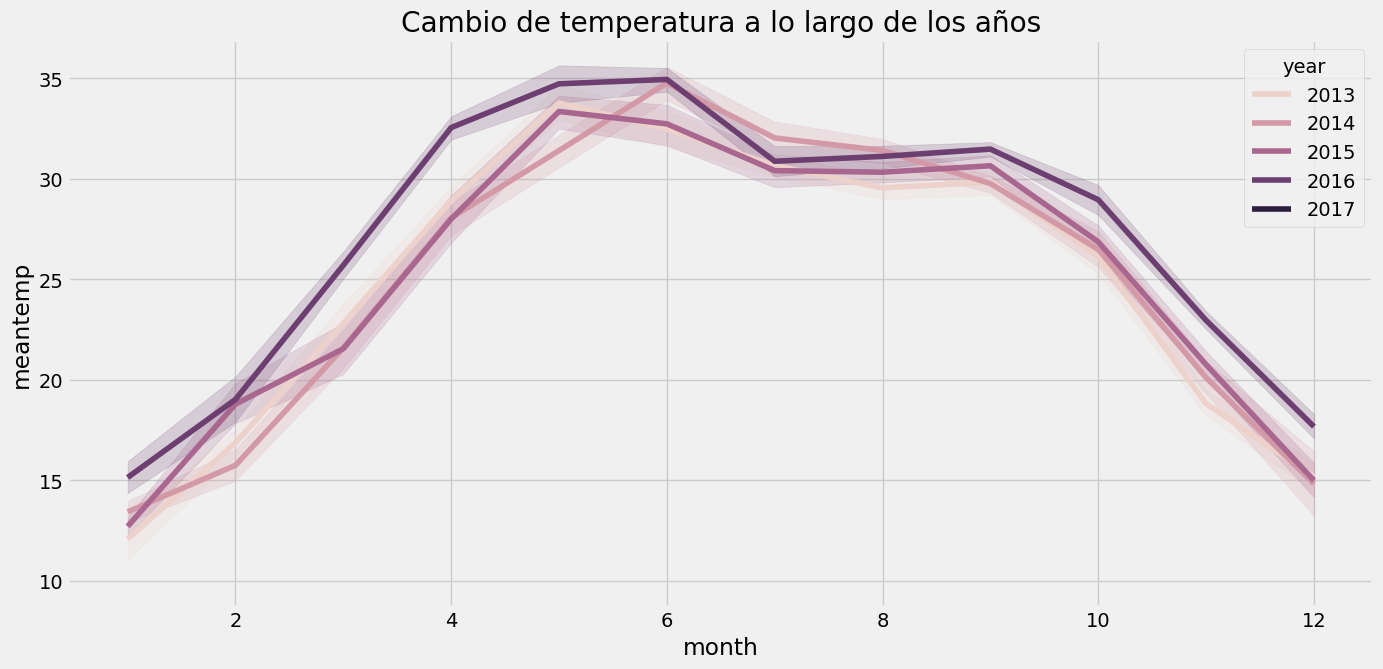

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7))
plt.title("Cambio de temperatura a lo largo de los años")
sns.lineplot(data = df, x='month', y='meantemp', hue='year')
plt.show()

* Se observa que del año 2016 al 2017 el incremento de la temperatura  en Delhi es significativo, de lo cual se observa que a medida que pasan los años la temperatura promedio continúa incrementando.

C:\Users\Alex\AppData\Local\Temp\ipykernel_7968\3983168120.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



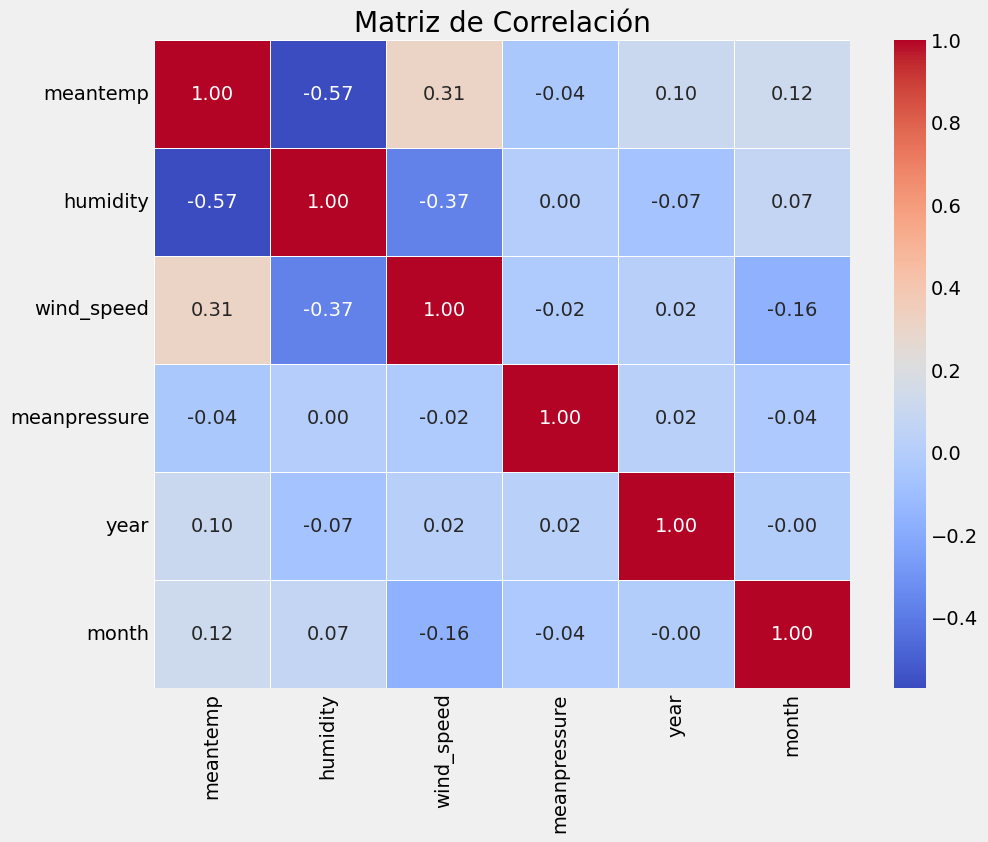

In [35]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Pre procesamiento

In [60]:
# ESCALAR DATOS
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy()

# Crear una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las columnas que deseas escalar
columnas_a_escalar = ['meantemp', 'humidity',  'wind_speed',  'meanpressure']

# Ajustar el escalador a las columnas seleccionadas
scaler.fit(df_scaled[columnas_a_escalar])

# Aplicar la transformación de escala a las columnas seleccionadas
df_scaled[columnas_a_escalar] = scaler.transform(df_scaled[columnas_a_escalar])

print(df_scaled)

           date  meantemp  humidity  wind_speed  meanpressure  year  month
0    2013-01-01  0.122271  0.820957    0.000000      0.132603  2013      1
1    2013-01-02  0.042795  0.907591    0.070583      0.132881  2013      1
2    2013-01-03  0.035662  0.849835    0.109743      0.132994  2013      1
3    2013-01-04  0.081514  0.668867    0.029212      0.132799  2013      1
4    2013-01-05  0.000000  0.847910    0.087636      0.132712  2013      1
...         ...       ...       ...         ...           ...   ...    ...
1457 2016-12-28  0.342890  0.630865    0.084032      0.132590  2016     12
1458 2016-12-29  0.282387  0.859736    0.142113      0.132764  2016     12
1459 2016-12-30  0.247453  0.880638    0.148429      0.132895  2016     12
1460 2016-12-31  0.276718  0.849835    0.173496      0.132660  2016     12
1461 2017-01-01  0.122271  1.000000    0.000000      0.132647  2017      1

[1462 rows x 7 columns]


### Modelado

* El modelo de "prophet" acepta datos de tiempo denominados como "ds" y etiquetas como "y". Por lo que debemos llevar a dicho formato nuestro dataset:

In [61]:
fc_df = df_scaled.rename(columns = {"date": "ds", "meantemp": "y"})
print(fc_df) # forecast_df

             ds         y  humidity  wind_speed  meanpressure  year  month
0    2013-01-01  0.122271  0.820957    0.000000      0.132603  2013      1
1    2013-01-02  0.042795  0.907591    0.070583      0.132881  2013      1
2    2013-01-03  0.035662  0.849835    0.109743      0.132994  2013      1
3    2013-01-04  0.081514  0.668867    0.029212      0.132799  2013      1
4    2013-01-05  0.000000  0.847910    0.087636      0.132712  2013      1
...         ...       ...       ...         ...           ...   ...    ...
1457 2016-12-28  0.342890  0.630865    0.084032      0.132590  2016     12
1458 2016-12-29  0.282387  0.859736    0.142113      0.132764  2016     12
1459 2016-12-30  0.247453  0.880638    0.148429      0.132895  2016     12
1460 2016-12-31  0.276718  0.849835    0.173496      0.132660  2016     12
1461 2017-01-01  0.122271  1.000000    0.000000      0.132647  2017      1

[1462 rows x 7 columns]


In [62]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
# crear el modelo
model = Prophet()
# entrenar el modelo
model.fit(fc_df)
# Crear un DataFrame con las fechas futuras que se desea predecir(para 365 días)
forecasts = model.make_future_dataframe(periods=365)
# predecir
predictions = model.predict(forecasts)

# graficar resultados de las predicciones
plot_plotly(model, predictions)

17:00:18 - cmdstanpy - INFO - Chain [1] start processing
17:00:18 - cmdstanpy - INFO - Chain [1] done processing


### haciendo uso del dataset de test

In [63]:
df_test = pd.read_csv("../0.dataset/DailyDelhiClimateTest.csv")

# Aplicar la transformación de escala a las columnas seleccionadas
df_test[columnas_a_escalar] = scaler.transform(df_test[columnas_a_escalar])

test_data = df_test.rename(columns = {"date": "ds", "meantemp": "y"})
print(test_data)

             ds         y  humidity  wind_speed  meanpressure
0    2017-01-01  0.303019  0.836777    0.064981      0.008076
1    2017-01-02  0.382096  0.736890    0.068556      0.132943
2    2017-01-03  0.339641  0.790796    0.095137      0.132950
3    2017-01-04  0.388210  0.654043    0.107650      0.132608
4    2017-01-05  0.378700  0.710579    0.078162      0.132430
..          ...       ...       ...         ...           ...
109  2017-04-20  0.871179  0.162541    0.131750      0.130385
110  2017-04-21  0.863537  0.299711    0.164910      0.130548
111  2017-04-22  0.822271  0.317327    0.210564      0.130772
112  2017-04-23  0.821507  0.162541    0.235966      0.130841
113  2017-04-24  0.794760  0.158416    0.287947      0.131103

[114 rows x 5 columns]


In [64]:
# Crear un DataFrame con las fechas futuras que se desea predecir
future_dates = model.make_future_dataframe(periods=len(test_data))

# Realizar las predicciones en el conjunto de prueba
predictions = model.predict(future_dates)

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Obtener los valores reales del conjunto de prueba
actual_values = test_data['y'].values

# Obtener los valores predichos del DataFrame de predicciones
predicted_values = predictions['yhat'].values[-len(test_data):]

# Calcular el error medio absoluto (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calcular el error cuadrático medio raíz (RMSE)
rmse = np.sqrt(mse)

# Calcular R2
r2 = r2_score(actual_values, predicted_values)

print(f'mae: {mae}\n')
print(f'mse: {mse}\n')
print(f'rmse: {rmse}\n')
print(f'r2: {r2}\n')

mae: 0.07081517054469232

mse: 0.007781982223207649

rmse: 0.08821554411331174

r2: 0.7922851801839346



In [66]:
# graficar resultados de las predicciones
plot_plotly(model, predictions)

## Conclusión

* Debido a que los resultados obtenidos son bajos se puede concluir que los resultados son buenos ya que indican una pequeña diferencia entre los valores predichos y observados de las variables meteorológicas y adicional a ello se obtuvo un r2 de 0.79, el cual nos indica que existe un buen ajuste del modelo a los datos.